**CS481 Notebook 9**: Text corpora loading and simple analysis with NTLK

Import nltk package (and matplot for some graphs):

In [ ]:
import nltk
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In NLTK you can download (to your hardrive all available corpora at once with:

In [10]:
# nltk.download()

Or you can download them individually:

In [11]:
nltk.download('brown')
nltk.download('gutenberg')
nltk.download('reuters')
# You can add / download other corpora as well

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\dzikjac\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\dzikjac\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\dzikjac\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

Let's pick our corpus to work with:

In [12]:
corpus = nltk.corpus.brown
# corpus = nltk.corpus.gutenberg
# corpus = nltk.corpus.reuters

Some corpora will have categories, some won't. Let's try to display available categories if any:

In [13]:
try:
    print('Text corpus categories:')
    print()
    for category in corpus.categories():
        categoriesAvailable = True
        print(category)
except AttributeError :
    print('No categories for this corpus.')
    categoriesAvailable = False

Text corpus categories:

adventure
belles_lettres
editorial
fiction
government
hobbies
humor
learned
lore
mystery
news
religion
reviews
romance
science_fiction


Let's print out **sentences** (first 10) in the entire corpus:

In [51]:
sentences = corpus.sents()
for index in range(10):
    print(' '.join(sentences[index]))

The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .
The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .
The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. .
`` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' .
The jury said it did find that many of Georgia's registration and election laws `` are outmoded or inadequate and often ambiguous '' .
It recommended that Fulton legislators act `` to have th

In [16]:
#subCorpus = ntlk

All corpus **words** (tokens, really) can be extracted as follows:

In [17]:
words = corpus.words()

If we are interested in **frequency of word occurences** we can use NLTK's FreqDistribution function:

In [18]:
frequencyDistribution = nltk.FreqDist(word.lower() for word in words) # note lowercasing with lower()

Let me create a Python dictionary to hold WORDS and their FREQUENCY counts:

In [53]:
frequenciesAndWords = dict()

In [54]:
for word in words:
    frequenciesAndWords[word] = frequencyDistribution[word]

In [55]:
frequenciesAndWords = list(frequenciesAndWords.items())
frequenciesAndWords.sort(key = lambda a: a[1])
frequenciesAndWords.reverse()

# I can also break it back down:
labels, frequencies = map(list, zip(*frequenciesAndWords))

# let's display first thirty words with their frequencies:
for index in range(30):
    print(labels[index] , ' ', frequencies[index])

the   69971
,   58334
.   49346
of   36412
and   28853
to   26158
a   23195
in   21337
that   10594
is   10109
was   9815
he   9548
for   9489
``   8837
''   8789
it   8760
with   7289
as   7253
his   6996
on   6741
be   6377
;   5566
at   5372
by   5306
i   5164
this   5145
had   5133
?   4693
not   4610
are   4394


Time for some plots:

In [ ]:
numberOfWords = 30
yPos = range(len(labels))
plt.figure(figsize=(20,20))  #to increase the plot resolution

plt.bar(yPos[:numberOfWords], frequencies[:numberOfWords], align = 'center', alpha=0.5)
plt.xticks(yPos[:numberOfWords], labels[:numberOfWords])
plt.title('Token frequency counts in corpus [first 30 tokens]')
plt.xlabel('Word')
plt.ylabel('Frequency count')
plt.xticks(rotation=90)    #to rotate x-axis values

plt.show()

In [ ]:
labels2 = labels[:200]
frequencies2 = frequencies[:200]
fig, ax = plt.subplots()
xs = range(len(labels2))


def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels2[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.plot(xs, frequencies2)
ax.set_title('Token frequency counts in corpus [first 200 tokens]')
plt.xlabel('Word')
plt.ylabel('Frequency count')
plt.xticks(rotation=90)
plt.show()

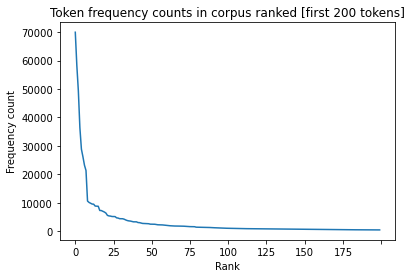

In [34]:
labels2 = labels[:200]
frequencies2 = frequencies[:200]
fig, ax = plt.subplots()
xs = range(len(labels2))
labels2 = range(len(labels2))


def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels2[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.plot(xs, frequencies2)
ax.set_title('Token frequency counts in corpus ranked [first 200 tokens]')
plt.xlabel('Rank')
plt.ylabel('Frequency count')
plt.show()

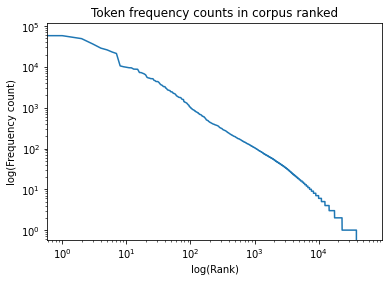

In [35]:
labels2 = labels[:200]
frequencies2 = frequencies[:200]
fig, ax = plt.subplots()
xs = range(len(labels))
labels2 = range(len(labels))


def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels2[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.plot(xs, frequencies)
ax.set_title('Token frequency counts in corpus ranked')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency count)')
plt.show()

Concordance example:

In [46]:
corpusAsText = nltk.Text(corpus.words())
corpusAsText.concordance('profound')

Displaying 25 of 27 matches:
only reiterated the United States' profound attachment to the alliance , `` co
e not only religious dogma , but a profound and unshakable Weltanschauung . U 
ress to you , once again , his own profound determination to go to the Mainlan
 '' . It is both great writing and profound religion . N.C. has said something
say that the idea of death is more profound in Irenaeus than the idea of sin i
 of the American people is clear , profound and far-reaching . To try to oppos
rable . The idea seems to threaten profound , barely conscious assumptions . A
 to the cause of revolution with a profound respect for legality . John Adams 
er and playing with orchids . More profound and more disturbing , however , is
Shakespeare's wit and wisdom , his profound insight into human nature , have s
 electorate would have caused us a profound moral shock . About this man we ha
al structure we find an additional profound difference between the third and t
y Shelley and Wordswort